## ¿What is the relation between the deaths due to COVID-19 and the test performed in Italy,  South Korea and the United States?

In [21]:

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks")

%matplotlib notebook


In [2]:
df_deaths =  pd.read_csv('data\\daily-covid-deaths-per-million-7-day-average.csv')

df_deaths.head()

,Entity,Code,Date,"Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)"
0,Afghanistan,AFG,"Jan 2, 2020",0.0
1,Afghanistan,AFG,"Jan 3, 2020",0.0
2,Afghanistan,AFG,"Jan 4, 2020",0.0
3,Afghanistan,AFG,"Jan 5, 2020",0.0
4,Afghanistan,AFG,"Jan 6, 2020",0.0


In [3]:
dates = df_deaths['Date'].tolist()

In [4]:
# Edición de las fechas al formato del objeto datetime:
dates = df_deaths['Date'].tolist()

index = 0
for date in dates:
    date_object = datetime.datetime.strptime(date, "%b %d, %Y")
    df_deaths['Date'].iloc[index]= date_object
    index += 1


C:\Users\alvaro\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
filter1 = df_deaths['Date'] >= datetime.datetime(2020, 1, 25)

df_deaths_filter = df_deaths[filter1]

In [6]:
countries = df_deaths_filter['Entity'].unique().tolist()

Now, the data for the test/day is formated

In [7]:
df_tests =  pd.read_csv('data\\full-list-covid-19-tests-per-day.csv')
df_tests.head()

,Entity,Code,Date,Daily change in cumulative total tests
0,Argentina,ARG,"Apr 9, 2020",1520
1,Argentina,ARG,"Apr 10, 2020",1529
2,Argentina,ARG,"Apr 11, 2020",1648
3,Australia,AUS,"Apr 3, 2020",16278
4,Australia,AUS,"Apr 7, 2020",8038


In [8]:
dates = df_tests['Date'].tolist()

index = 0
for date in dates:
    date_object = datetime.datetime.strptime(date, "%b %d, %Y")
    df_tests['Date'].iloc[index]= date_object
    index += 1

In [9]:
filter1 = df_tests['Date'] >= datetime.datetime(2020, 1, 25)

df_tests_filter = df_tests[filter1]

<IPython.core.display.Javascript object>


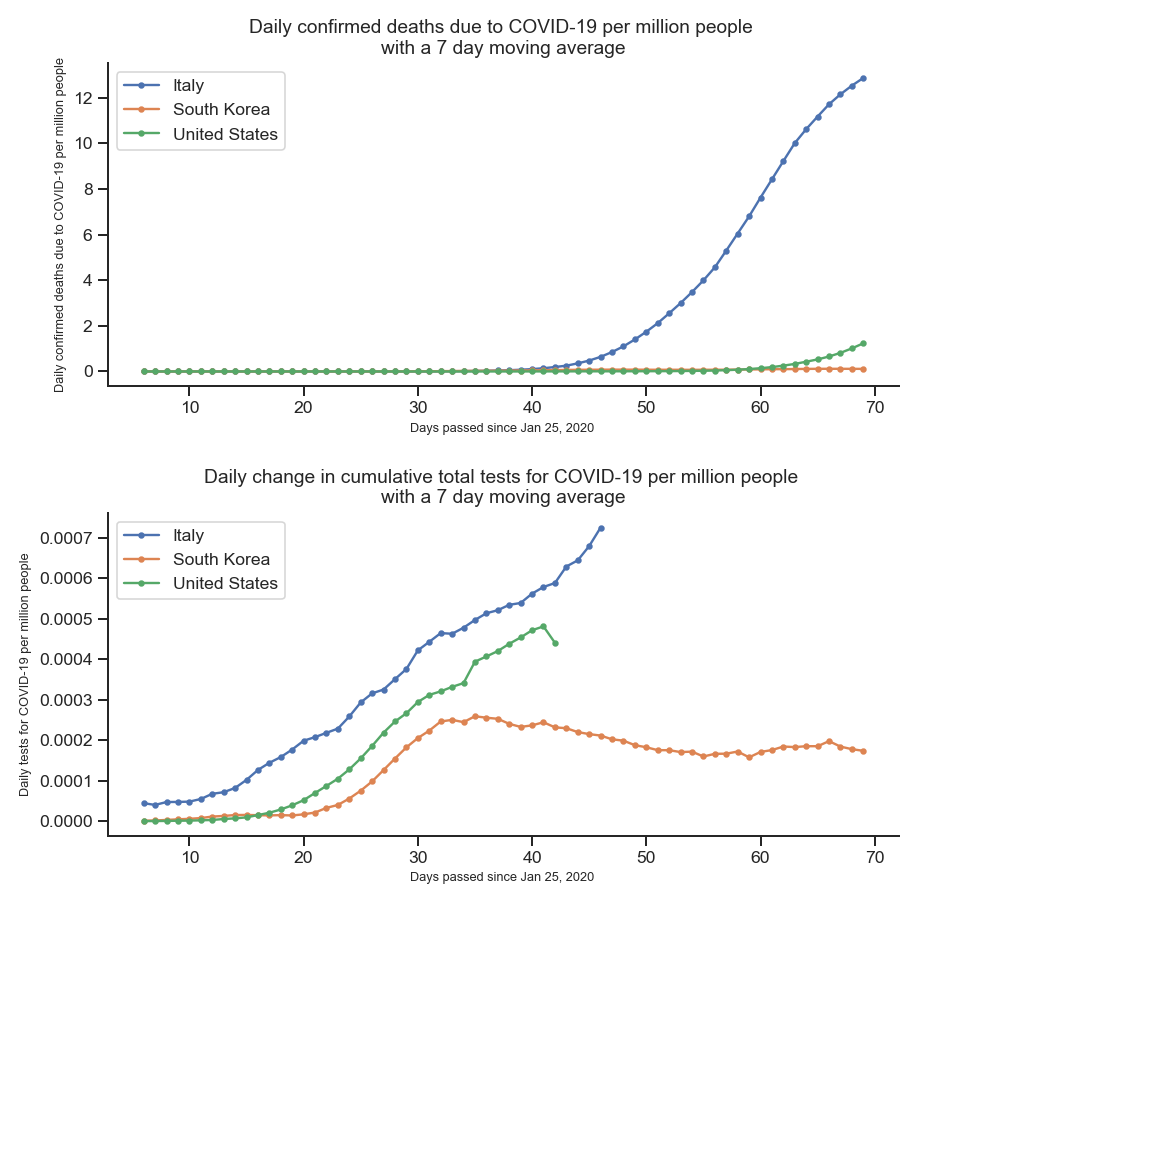

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

for country in countries:
    if country == 'South Korea':
        df_country = df_deaths_filter[df_deaths_filter.Entity==country]
        x1 = range(len(df_country))[0:70]
        y1 = df_country['Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)'].rolling(window=7).mean()[0:70]
        line1, = ax[0].plot(x1, y1, marker='.', label=country)
        
    if country == 'Italy':  
        df_country = df_deaths_filter[df_deaths_filter.Entity==country]
        x2 = range(len(df_country))[0:70]
        y2 = df_country['Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)'].rolling(window=7).mean()[0:70]
        line2, = ax[0].plot(x2, y2, marker='.', label=country)
    
    if country == 'United States':  
        df_country = df_deaths_filter[df_deaths_filter.Entity==country]
        x3 = range(len(df_country))[0:70]
        y3 = df_country['Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)'].rolling(window=7).mean()[0:70]
        line3, = ax[0].plot(x3, y3, marker='.', label=country)
        
        
ax[0].set_title('Daily confirmed deaths due to COVID-19 per million people \nwith a 7 day moving average', size=12)
ax[0].set_xlabel('Days passed since Jan 25, 2020 \n', size=8)
ax[0].set_ylabel('Daily confirmed deaths due to COVID-19 per million people', size=8)
ax[0].legend()
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)



##################################################


for country in countries:
    
    if country in ['South Korea', 'Italy', 'United States']:
        
        if country == 'South Korea':
            inhabitants = 51.64*1000000
        if country == 'Italy':
            inhabitants = 60.36*1000000
        if country == 'United States':
            inhabitants = 328.2*1000000
        
        df_country = df_tests_filter[df_tests_filter.Entity==country]
        x = range(len(df_country))[0:70]
        y = df_country['Daily change in cumulative total tests'].rolling(window=7).mean()
        y = y.tolist()
        y = list(map(lambda x: x/inhabitants , y))[0:70]

        ax[1].plot(x, y, marker='.', label=country)
    
ax[1].set_title('Daily change in cumulative total tests for COVID-19 per million people \nwith a 7 day moving average', size=12)
ax[1].set_xlabel('Days passed since Jan 25, 2020 \n', size=8)
ax[1].set_ylabel('Daily tests for COVID-19 per million people', size=8)
ax[1].legend(loc='upper left')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()